In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [47]:
plt.rc("font", family="Malgun Gothic")

In [48]:
#005930 삼성전자 주식
samsung = fdr.DataReader("005930") #시계열 데이터의 특징은 인덱스가 date임. 독립변인 또한 date로 고정돼있다. 그래서 튜닝이 안 됨

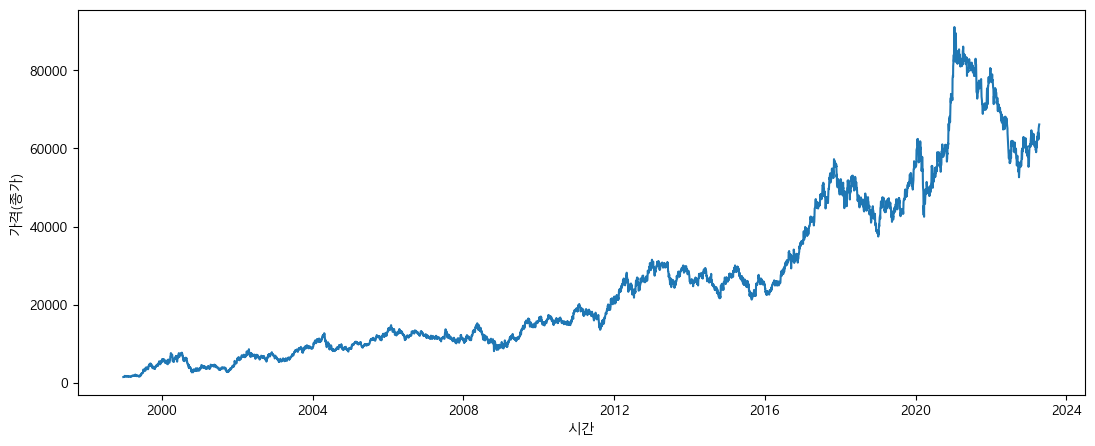

In [49]:
plt.figure(figsize=(13,5))
sns.lineplot(x=samsung.index, y="Close", data=samsung)
plt.xlabel("시간")
plt.ylabel("가격(종가)")
plt.show()

In [50]:
time_steps = [["1990","2000"], #이 매직넘버는 prophet이 만들어준다. 아주 짧거나 매우 긴건 불가능. 주기성있을 거라 생각되는 것만 가능
["2000","2010"],
["1910","2015"],
["2015","2020"],
["2020","2022"]]

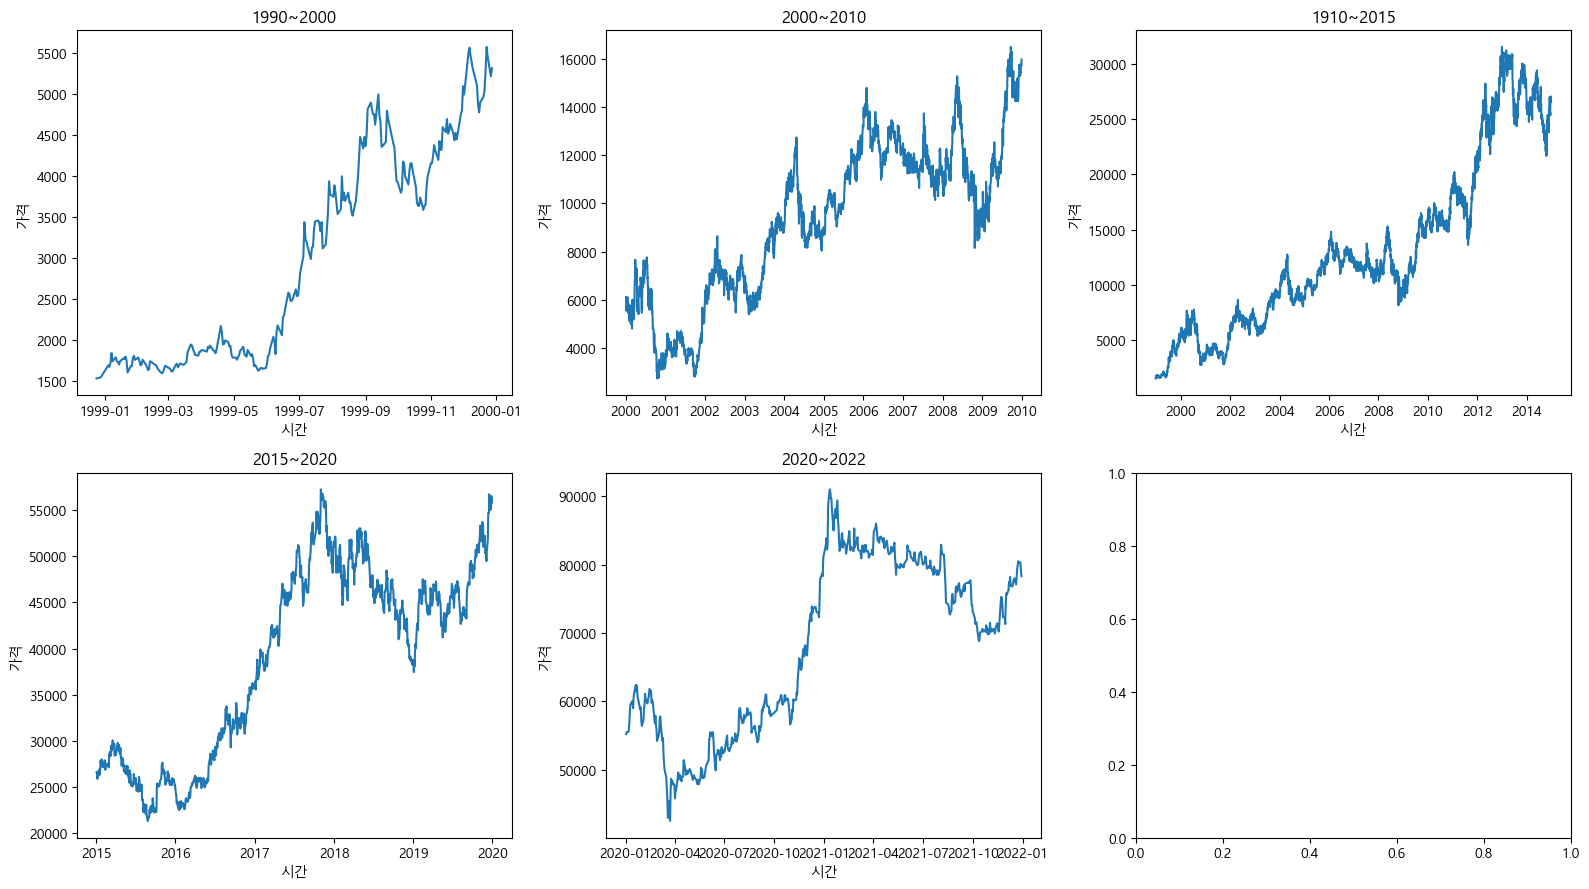

In [51]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(16,9)
for i in range(5):
    ax = axes[i//3, i%3]
    df = samsung.loc[(samsung.index > time_steps[i][0]) & (samsung.index < time_steps[i][1])]
    sns.lineplot(x=df.index, y=df["Close"], ax=ax)
    ax.set_title(f"{time_steps[i][0]}~{time_steps[i][1]}")
    ax.set_xlabel("시간")
    ax.set_ylabel("가격")
plt.tight_layout()
plt.show()

In [52]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

* y 컬럼과 ds 컬럼이 존재해야만 함

In [57]:
# 데이터 가공(시계열은 na값 날리면 안 됨! 불규칙 발생함. na값을 채워야 함)
stock = fdr.DataReader("005930","2022")
stock["y"] = stock["Close"]
stock["ds"] = stock.index
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,78600,2022-01-03
2022-01-04,78800,79200,78300,78700,12427416,0.001272,78700,2022-01-04
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,77400,2022-01-05
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,76900,2022-01-06
2022-01-07,78100,78400,77400,78300,15163757,0.018205,78300,2022-01-07


In [58]:
# RAW 데이터를 fit!
m = Prophet()
m.fit(stock)

16:21:50 - cmdstanpy - INFO - Chain [1] start processing
16:21:50 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
#예측을 원하는 기간을 'D'일 기준으로 설정
future = m.make_future_dataframe(periods=30) #
future.tail()

,ds
342,2023-05-09
343,2023-05-10
344,2023-05-11
345,2023-05-12
346,2023-05-13


In [64]:
#예측
forecast = m.predict(future)
forecast.tail() # yhat - 예측값

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
342,2023-05-09,64072.079937,61581.101765,66372.642718,63930.049844,64232.941692,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,0.0,0.0,0.0,63901.909904
343,2023-05-10,64100.308690,61620.102690,66253.790976,63944.467148,64269.768818,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,0.0,0.0,0.0,63932.369444
344,2023-05-11,64128.537443,61601.007688,66377.676626,63963.635425,64308.124815,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,0.0,0.0,0.0,63910.699782
345,2023-05-12,64156.766196,61666.766712,66517.147114,63978.643329,64344.664673,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,0.0,0.0,0.0,64137.238837
346,2023-05-13,64184.994949,62041.698857,66860.962190,63996.701559,64382.267257,349.894022,349.894022,349.894022,349.894022,349.894022,349.894022,0.0,0.0,0.0,64534.888971


In [67]:
#date, 예측값, 상,하한값
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].iloc[-40:-20] #loc, iloc 차이? 일단 loc먼저써보고 안되면 iloc

,ds,yhat,yhat_lower,yhat_upper
307,2023-03-31,62951.631210,60525.430945,65489.763196
308,2023-04-03,62931.531191,60726.568194,65129.244952
309,2023-04-04,62913.903549,60644.622299,65346.377804
310,2023-04-05,62944.363088,60469.400865,65182.349051
311,2023-04-06,62922.693426,60539.994794,65484.911756
312,2023-04-07,63149.232481,60921.065796,65635.827916
313,2023-04-10,63129.132462,60830.542342,65454.155194
314,2023-04-11,63111.504820,60652.382995,65448.815712
315,2023-04-12,63141.964359,60950.380174,65559.954555
316,2023-04-13,63120.294698,60750.546388,65493.251364


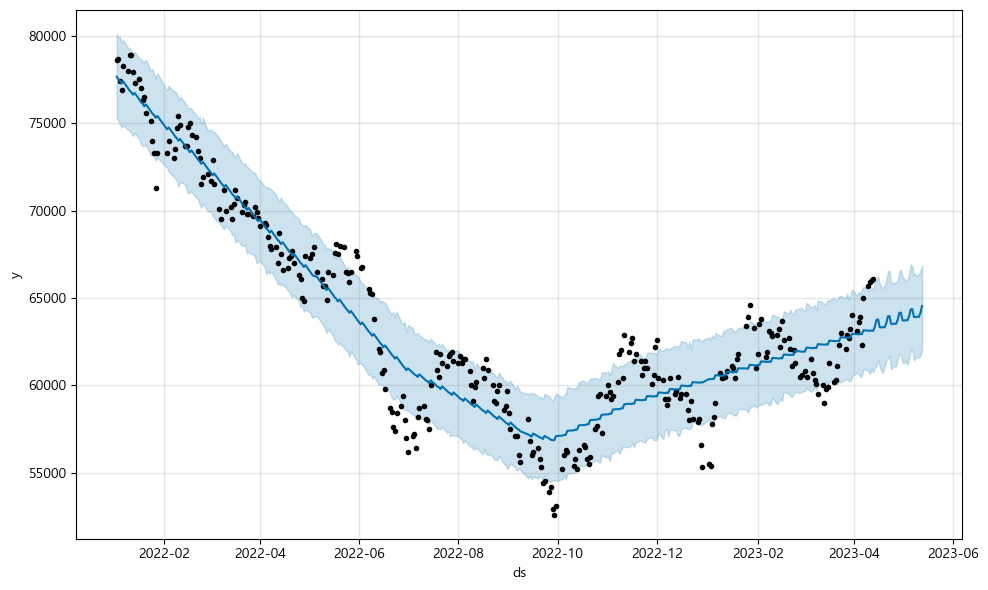

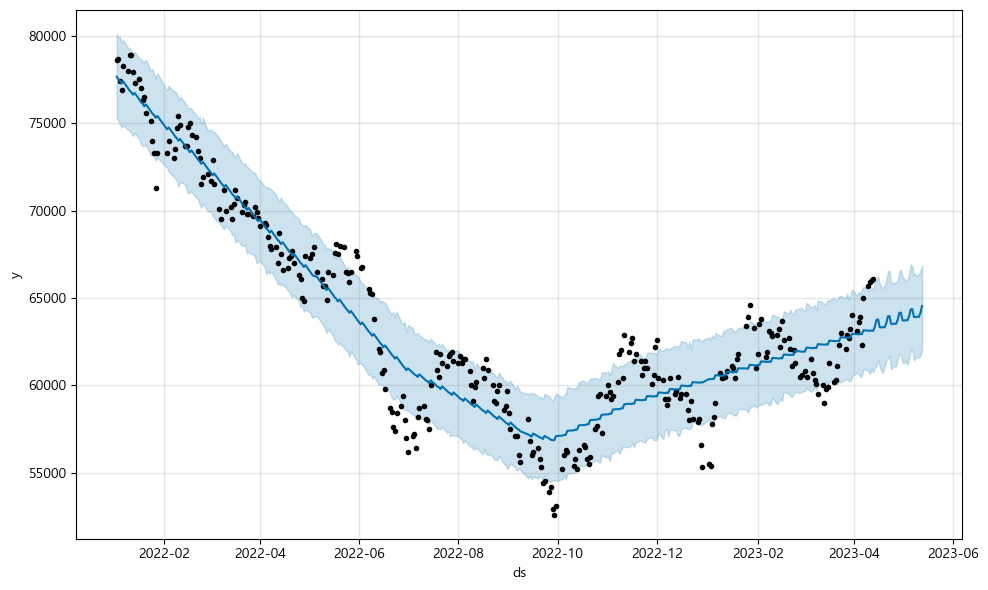

In [68]:
m.plot(forecast)

In [72]:
#이왕이면 plotly 사용
fig = plot_plotly(m, forecast)
fig

In [73]:
# 세부 컴포넌트 이용해서 데이터 확인
plot_components_plotly(m, forecast)

In [74]:
# 변경점 확인
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast) #변곡점, 아웃라이어
#과적합??

16:57:03 - cmdstanpy - INFO - Chain [1] start processing
16:57:03 - cmdstanpy - INFO - Chain [1] done processing


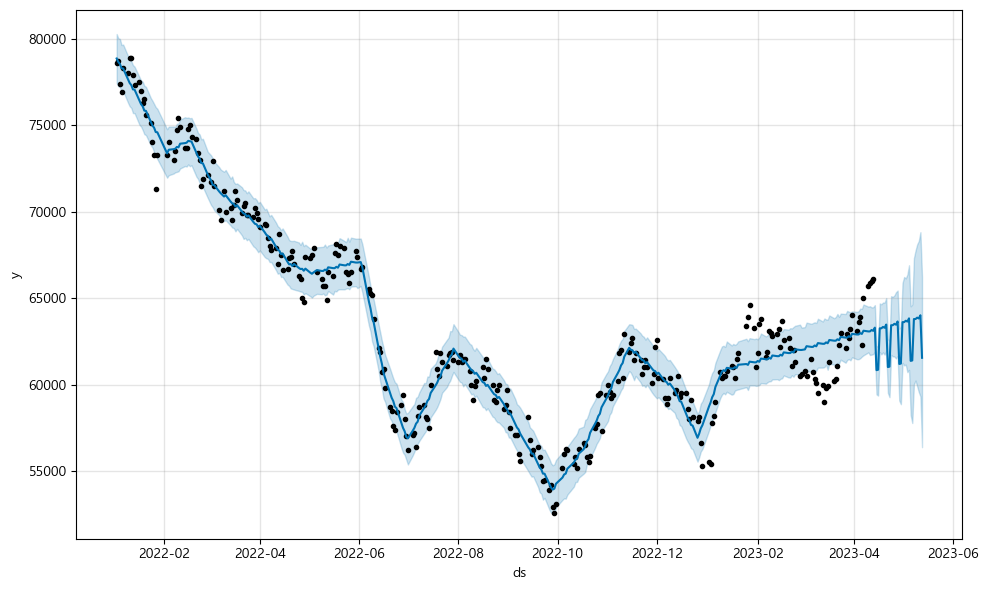

In [77]:
# 유연성 => 계수가 낮으면 과소적합, 높으면 과대적합 => 하이퍼파라미터! (사람이 해야함)
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)